In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVC,SVC
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [2]:
data = pd.read_csv('./glass.csv')
pd.set_option('display.max_columns',None)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
data.shape

(214, 10)

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

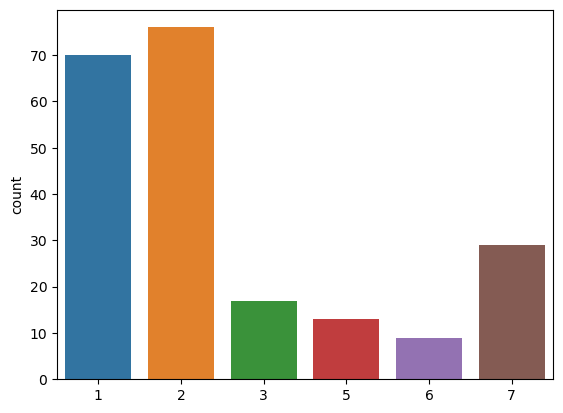

In [12]:
sns.countplot(x=y)
plt.show()

In [13]:
smote = SMOTE()

In [14]:
x_smote,y_smote = smote.fit_resample(x,y)

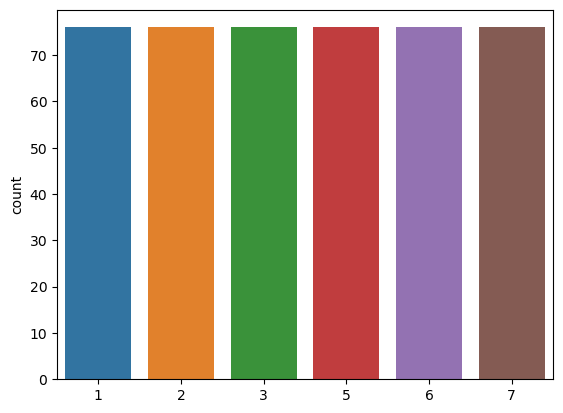

In [15]:
sns.countplot(x=y_smote)
plt.show()

In [16]:
x = x_smote 
y = y_smote

In [17]:
models = {"LogisticRegression":LogisticRegression(random_state=43),
          "RandomForestClassifier":RandomForestClassifier(random_state=42),
          "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
          "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
          "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
          "KNeighborsClassifier":KNeighborsClassifier(),
          "LinearSVC":LinearSVC(random_state=43)
    
}

In [18]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",n_jobs=-1,cv=10)
    print("Cross validation model:{}".format(name))
    print("Mean score:",np.mean(scores)*100)
    print("*"*100)

Cross validation model:LogisticRegression
Mean score: 79.6376811594203
****************************************************************************************************
Cross validation model:RandomForestClassifier
Mean score: 88.82608695652173
****************************************************************************************************
Cross validation model:DecisionTreeClassifier
Mean score: 84.64734299516907
****************************************************************************************************
Cross validation model:AdaBoostClassifier
Mean score: 45.57971014492754
****************************************************************************************************
Cross validation model:GradientBoostingClassifier
Mean score: 89.48309178743962
****************************************************************************************************
Cross validation model:KNeighborsClassifier
Mean score: 83.34299516908213
**********************************************

### selecting randomforestclassifier

In [19]:
y = label_binarize(y,classes=[1,2,3,5,6,7])
n_classes = 6

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [21]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=47))


In [22]:
y_score = clf.fit(x_train,y_train).predict_proba(x_test)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

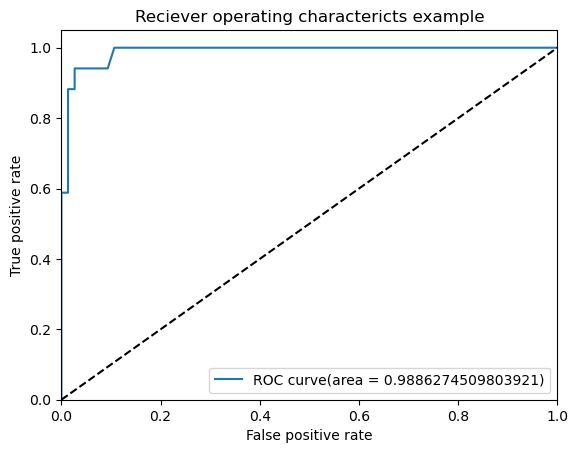

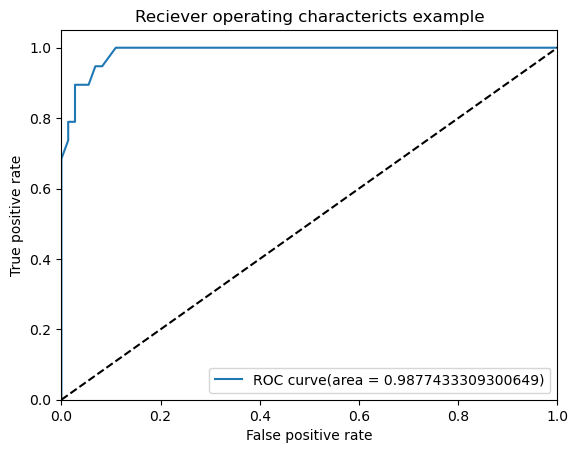

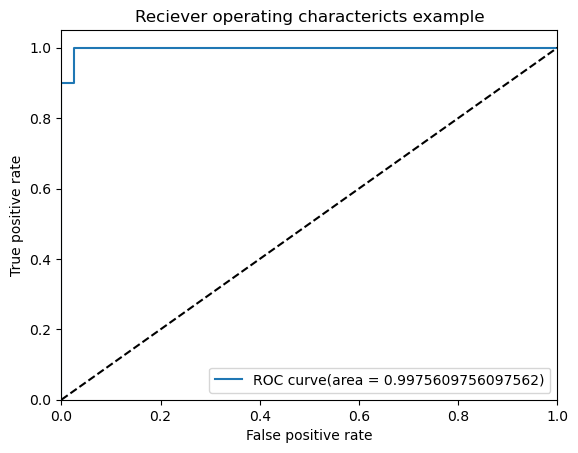

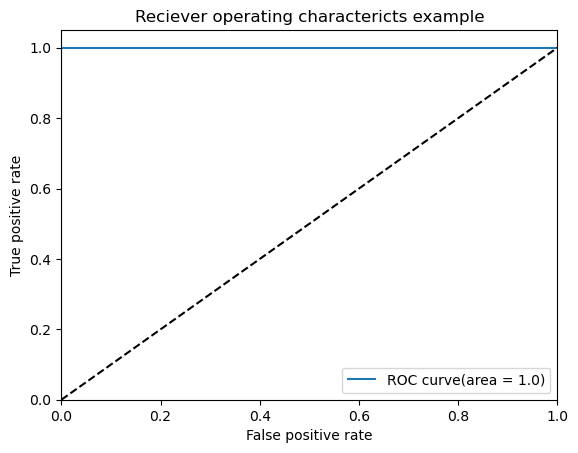

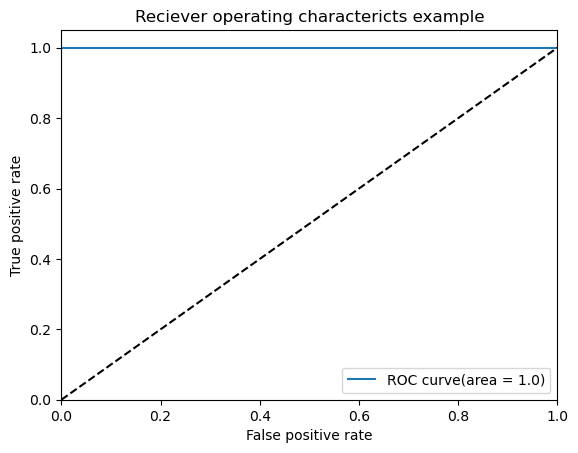

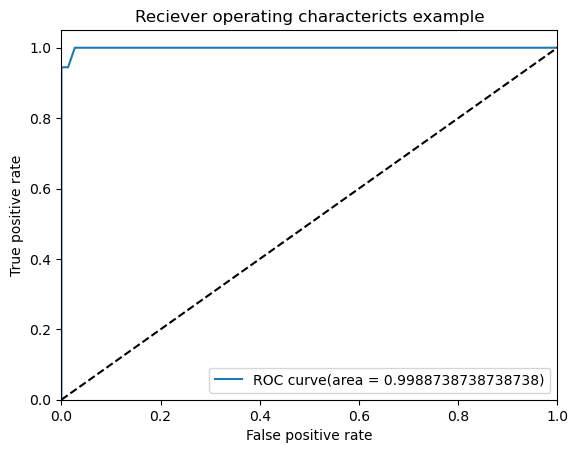

In [24]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = "ROC curve(area = {})".format(roc_auc[i]))
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciever operating charactericts example")
    plt.legend(loc = "lower right")
    plt.show()